In [1]:
import os
#path = os.path.abspath(os.path.join('..','..'))
#print(path)
#import sys

#sys.path.insert(0,path)
#print(sys.executable)

from dcapy import dca
from dcapy.models import CashFlow, ChgPts, CashFlowModel, Period, Scenario

import numpy as np 
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
import seaborn as sns

In [2]:
cashflow_params = [
            {
                'name':'fix_opex',
                'const_value':-5000,
                'target':'opex',
            },
            {
                'name':'var_opex',
                'const_value':-5,
                'target':'opex',
                'multiply':'oil_volume'
            },
            {
                'name':'income',
                'const_value':60,
                'target':'income',
                'multiply':'oil_volume'
            },
            {
                'name':'capex',
                'array_values':{'date':['2021-01-01'],'value':[-4000000]},
                'target':'capex'
            }
        ]

In [3]:
p1_dict = {
    'name':'pdp',
    'dca': {
        'ti':'2021-01-01',
        'bsw':0.3,
        'slope':[2e-5,1e-5],
        'fluid_rate':1000,
        'gor':0.3
    },
    'start':'2021-01-01',
    'end':'2022-01-01',
    'freq_input':'M',
    'freq_output':'M'
}


p1 = Period(**p1_dict)
p1

Period(name='pdp', dca=Wor(bsw=0.3, slope=[2e-05, 1e-05], fluid_rate=1000.0, ti=datetime.date(2021, 1, 1), seed=None, gor=0.3, glr=None), start=datetime.date(2021, 1, 1), end=datetime.date(2022, 1, 1), time_list=None, freq_input='M', freq_output='M', rate_limit=None, cum_limit=None, iter=1, ppf=None, cashflow_params=None, cashflow=None, depends=None, forecast=None)

In [4]:
p2_dict = {
    'name':'pud',
    'dca': {
        'ti':'2021-01-01',
        'bsw':0.3,
        'slope':[2e-5,1e-5],
        'fluid_rate':1000,
        'gor':0.3
    },
    'start':'2022-01-01',
    'end':'2023-01-01',
    'freq_input':'M',
    'freq_output':'M'
}

p2 = Period(**p2_dict)
p2

Period(name='pud', dca=Wor(bsw=0.3, slope=[2e-05, 1e-05], fluid_rate=1000.0, ti=datetime.date(2021, 1, 1), seed=None, gor=0.3, glr=None), start=datetime.date(2022, 1, 1), end=datetime.date(2023, 1, 1), time_list=None, freq_input='M', freq_output='M', rate_limit=None, cum_limit=None, iter=1, ppf=None, cashflow_params=None, cashflow=None, depends=None, forecast=None)

In [5]:
s1 = Scenario(name='base', periods=[p1,p2], cashflow_params=cashflow_params)


In [6]:
s1_f = s1.generate_forecast()
s1_f

,iteration,oil_rate,water_rate,oil_cum,gas_rate,water_cum,bsw,wor,wor_1,delta_time,fluid_rate,fluid_cum,gas_cum,oil_volume,water_volume,gas_volume,period,scenario
date,,,,,,,,,,,,,,,,,,
2021-01,0,655.596404,344.403596,20323.488531,196.678921,10676.511469,0.344404,0.527821,1.527821,1.0,1000.0,31000.0,6097.046559,20276.242593,10723.757407,6097.046559,pdp,base
2021-01,1,677.822890,322.177110,21012.509598,203.346867,9987.490402,0.322177,0.475875,1.475875,1.0,1000.0,31000.0,6303.752879,20988.830611,10011.169389,6303.752879,pdp,base
2021-02,0,570.189855,429.810145,36288.804475,171.056957,22711.195525,0.429810,0.756560,1.756560,1.0,1000.0,59000.0,10886.641342,15926.259334,12073.740666,4789.594783,pdp,base
2021-02,1,634.191986,365.808014,38769.885213,190.257596,20230.114787,0.365808,0.577364,1.577364,1.0,1000.0,59000.0,11630.965564,17736.778097,10263.221903,5327.212684,pdp,base
2021-03,0,492.473724,507.526276,51555.489924,147.742117,38444.510076,0.507526,1.034639,2.034639,1.0,1000.0,90000.0,15466.646977,15228.601876,15771.398124,4580.005635,pdp,base
2021-03,1,591.337678,408.662322,57101.353244,177.401304,32898.646756,0.408662,0.691873,1.691873,1.0,1000.0,90000.0,17130.405973,18309.326030,12690.673970,5499.440409,pdp,base
2021-04,0,423.296192,576.703808,64254.375683,126.988858,55745.624317,0.576704,1.366647,2.366647,1.0,1000.0,120000.0,19276.312705,12667.931665,17332.068335,3809.665727,pdp,base
2021-04,1,548.741612,451.258388,73563.601594,164.622484,46436.398406,0.451258,0.823190,1.823190,1.0,1000.0,120000.0,22069.080478,16441.874075,13558.125925,4938.674505,pdp,base
2021-05,0,365.930746,634.069254,75598.228821,109.779224,75401.771179,0.634069,1.737483,2.737483,1.0,1000.0,151000.0,22679.468646,11317.565289,19682.434711,3403.155941,pdp,base


<AxesSubplot:xlabel='date', ylabel='oil_rate'>

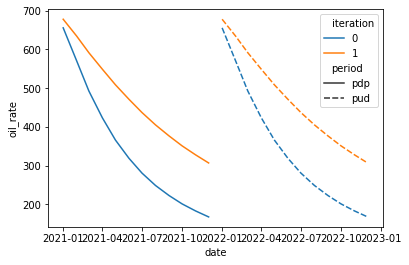

In [7]:
sns.lineplot(data=s1_f, x=s1_f.index.to_timestamp(), y='oil_rate', hue='iteration', style='period')

In [8]:
s1_c = s1.generate_cashflow()
s1_c[1].fcf()

,income,income,total_income,fix_opex,var_opex,fix_opex,var_opex,total_opex,capex,capex,total_capex,fcf,cum_fcf
2021-01,1.259330e+06,0.000000e+00,1.259330e+06,-5000.0,-104944.153053,0.0,0.000000,-109944.153053,-4000000.0,0.0,-4000000.0,-2.850614e+06,-2.850614e+06
2021-02,1.064207e+06,0.000000e+00,1.064207e+06,-5000.0,-88683.890486,0.0,0.000000,-93683.890486,0.0,0.0,0.0,9.705228e+05,-1.880092e+06
2021-03,1.098560e+06,0.000000e+00,1.098560e+06,-5000.0,-91546.630149,0.0,0.000000,-96546.630149,0.0,0.0,0.0,1.002013e+06,-8.780786e+05
2021-04,9.865124e+05,0.000000e+00,9.865124e+05,-5000.0,-82209.370374,0.0,0.000000,-87209.370374,0.0,0.0,0.0,8.993031e+05,2.122448e+04
2021-05,9.447843e+05,0.000000e+00,9.447843e+05,-5000.0,-78732.027218,0.0,0.000000,-83732.027218,0.0,0.0,0.0,8.610523e+05,8.822768e+05
2021-06,8.471781e+05,0.000000e+00,8.471781e+05,-5000.0,-70598.177827,0.0,0.000000,-75598.177827,0.0,0.0,0.0,7.715800e+05,1.653857e+06
2021-07,8.116711e+05,0.000000e+00,8.116711e+05,-5000.0,-67639.257599,0.0,0.000000,-72639.257599,0.0,0.0,0.0,7.390318e+05,2.392889e+06
2021-08,7.525876e+05,0.000000e+00,7.525876e+05,-5000.0,-62715.630308,0.0,0.000000,-67715.630308,0.0,0.0,0.0,6.848719e+05,3.077761e+06
2021-09,6.772751e+05,0.000000e+00,6.772751e+05,-5000.0,-56439.594367,0.0,0.000000,-61439.594367,0.0,0.0,0.0,6.158355e+05,3.693596e+06
2021-10,6.521546e+05,0.000000e+00,6.521546e+05,-5000.0,-54346.218023,0.0,0.000000,-59346.218023,0.0,0.0,0.0,5.928084e+05,4.286404e+06


In [9]:
for i in s1_c:
    print(i.income)

[CashFlow(name='income', const_value=[1216574.5555893613, 955575.560020744, 913716.1125613222, 760075.8998856633, 679053.9173447861, 572832.5069413641, 520870.6111134811, 461704.28599297954, 400309.85414545005, 373615.52832187165, 328903.909993445, 311217.14427138784], start=datetime.date(2021, 1, 31), end=datetime.date(2021, 12, 31), periods=None, freq_output='M', freq_input='M', chgpts=None), CashFlow(name='income', const_value=[1216574.5555893613, 955575.560020744, 913716.1125613222, 760075.8998856633, 679053.9173447861, 572832.5069413641, 520870.6111134811, 461704.28599297954, 400309.85414545005, 373615.52832187165, 328903.909993445, 311217.14427138784], start=datetime.date(2022, 1, 31), end=datetime.date(2022, 12, 31), periods=None, freq_output='M', freq_input='M', chgpts=None)]
[CashFlow(name='income', const_value=[1259329.8366395934, 1064206.6858293745, 1098559.5617899206, 986512.4444938672, 944784.3266159224, 847178.1339272419, 811671.091191906, 752587.5636962745, 677275.132398

In [10]:
s1_c[1].fcf()

,income,income,total_income,fix_opex,var_opex,fix_opex,var_opex,total_opex,capex,capex,total_capex,fcf,cum_fcf
2021-01,1.259330e+06,0.000000e+00,1.259330e+06,-5000.0,-104944.153053,0.0,0.000000,-109944.153053,-4000000.0,0.0,-4000000.0,-2.850614e+06,-2.850614e+06
2021-02,1.064207e+06,0.000000e+00,1.064207e+06,-5000.0,-88683.890486,0.0,0.000000,-93683.890486,0.0,0.0,0.0,9.705228e+05,-1.880092e+06
2021-03,1.098560e+06,0.000000e+00,1.098560e+06,-5000.0,-91546.630149,0.0,0.000000,-96546.630149,0.0,0.0,0.0,1.002013e+06,-8.780786e+05
2021-04,9.865124e+05,0.000000e+00,9.865124e+05,-5000.0,-82209.370374,0.0,0.000000,-87209.370374,0.0,0.0,0.0,8.993031e+05,2.122448e+04
2021-05,9.447843e+05,0.000000e+00,9.447843e+05,-5000.0,-78732.027218,0.0,0.000000,-83732.027218,0.0,0.0,0.0,8.610523e+05,8.822768e+05
2021-06,8.471781e+05,0.000000e+00,8.471781e+05,-5000.0,-70598.177827,0.0,0.000000,-75598.177827,0.0,0.0,0.0,7.715800e+05,1.653857e+06
2021-07,8.116711e+05,0.000000e+00,8.116711e+05,-5000.0,-67639.257599,0.0,0.000000,-72639.257599,0.0,0.0,0.0,7.390318e+05,2.392889e+06
2021-08,7.525876e+05,0.000000e+00,7.525876e+05,-5000.0,-62715.630308,0.0,0.000000,-67715.630308,0.0,0.0,0.0,6.848719e+05,3.077761e+06
2021-09,6.772751e+05,0.000000e+00,6.772751e+05,-5000.0,-56439.594367,0.0,0.000000,-61439.594367,0.0,0.0,0.0,6.158355e+05,3.693596e+06
2021-10,6.521546e+05,0.000000e+00,6.521546e+05,-5000.0,-54346.218023,0.0,0.000000,-59346.218023,0.0,0.0,0.0,5.928084e+05,4.286404e+06


In [11]:
s1.periods[0].generate_cashflow()

[CashFlowModel(name='pdp_0', income=[CashFlow(name='income', const_value=[1216574.5555893613, 955575.560020744, 913716.1125613222, 760075.8998856633, 679053.9173447861, 572832.5069413641, 520870.6111134811, 461704.28599297954, 400309.85414545005, 373615.52832187165, 328903.909993445, 311217.14427138784], start=datetime.date(2021, 1, 31), end=datetime.date(2021, 12, 31), periods=None, freq_output='M', freq_input='M', chgpts=None)], opex=[CashFlow(name='fix_opex', const_value=-5000.0, start=datetime.date(2021, 1, 31), end=datetime.date(2021, 12, 31), periods=None, freq_output='M', freq_input='M', chgpts=None), CashFlow(name='var_opex', const_value=[-101381.21296578011, -79631.29666839534, -76143.00938011018, -63339.65832380527, -56587.82644539884, -47736.04224511368, -43405.88425945676, -38475.35716608163, -33359.15451212084, -31134.627360155973, -27408.659166120415, -25934.76202261565], start=datetime.date(2021, 1, 31), end=datetime.date(2021, 12, 31), periods=None, freq_output='M', fre

In [13]:
s1.npv([0])

,npv,iteration
0.0,9.619825e+06,0
0.0,1.467857e+07,1
